# Exploring the dataset

## CCMT Augmented Dataset

In [1]:
import os

import random
import shutil

from collections import Counter

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
root_dir = r'C:\Users\ayman\Downloads\Dataset for Crop Pest and Disease Detection/CCMT Dataset-Augmented'

train_dir = root_dir + '/train_set'
test_dir = root_dir + '/test_set'

crop_names = [
    'Cashew',
    'Cassava',
    'Maize',
    'Tomato'
]

Crop: Cashew Total: 4 Diseased: 3
                    no. of images
Cashew_anthracnose           2572
Cashew_healthy               4674
Cashew_leaf miner            2822
Cashew_red rust              3662


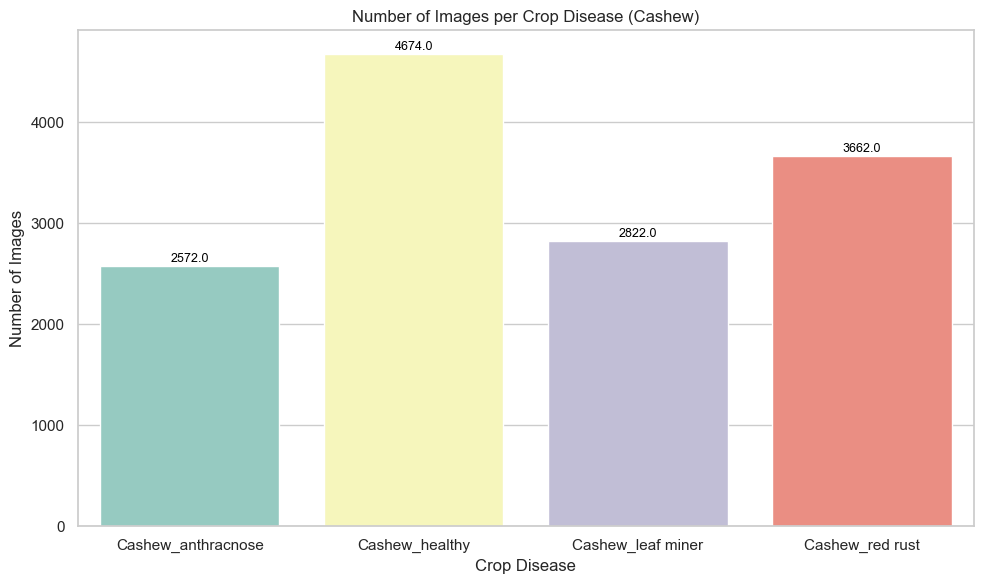

Crop: Cassava Total: 5 Diseased: 4
                          no. of images
Cassava_bacterial blight           7123
Cassava_brown spot                 2422
Cassava_green mite                 2397
Cassava_healthy                    1688
Cassava_mosaic                     1685


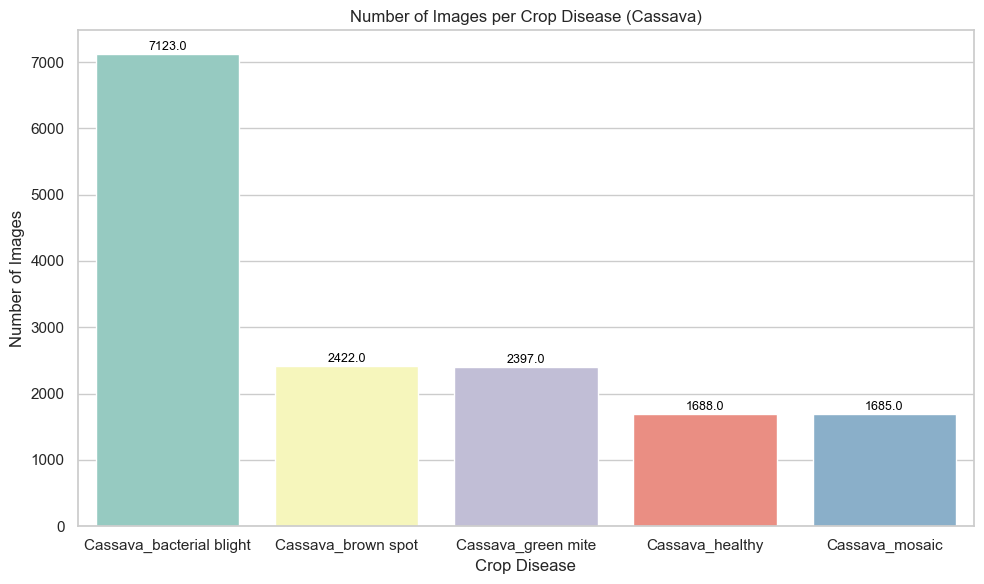

Crop: Maize Total: 4 Diseased: 3
                    no. of images
Maize_healthy                 649
Maize_leaf blight            3058
Maize_leaf spot              2176
Maize_streak virus           3117


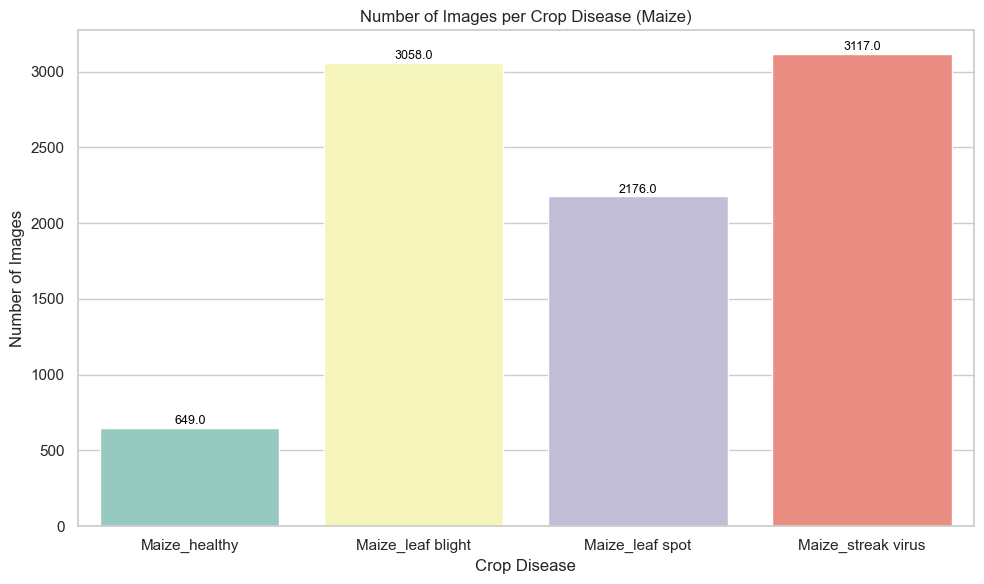

Crop: Tomato Total: 5 Diseased: 4
                           no. of images
Tomato_healthy                      1590
Tomato_leaf blight                  4149
Tomato_leaf curl                    1638
Tomato_septoria leaf spot           7468
Tomato_verticulium wilt             2081


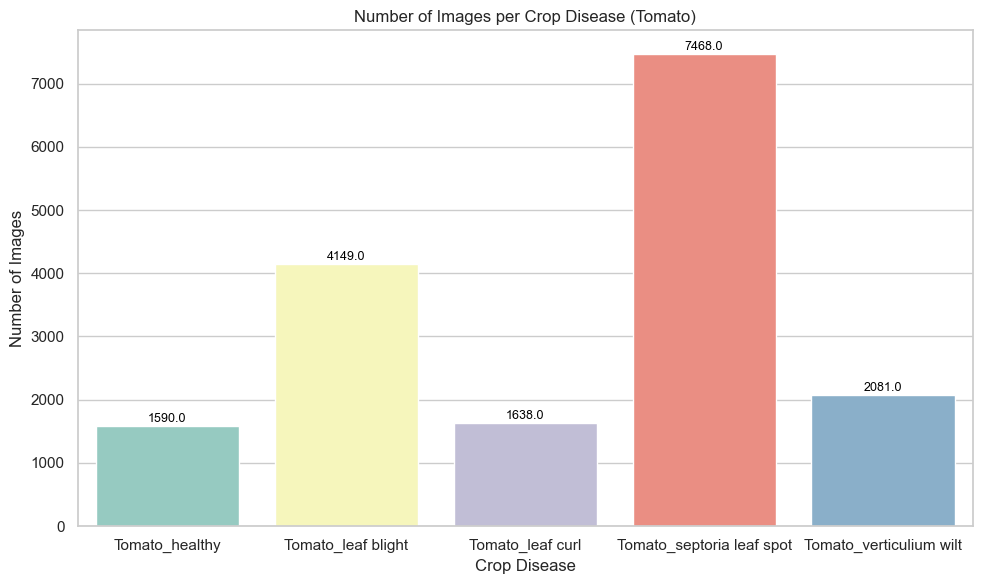

In [3]:
def analyze_crop(crop_name):
    crop_dir = os.path.join(train_dir, crop_name)

    disease = os.listdir(crop_dir)

    crop_info = {}
    for d in disease:
        name, status = d.split('_')
        if name in crop_info:
            crop_info[name]['total'] += 1
            if status != 'healthy':
                crop_info[name]['diseased'] += 1
        else:
            crop_info[name] = {'total': 1, 'diseased': 1 if status != 'healthy' else 0}

    for crop, stats in crop_info.items():
        print('Crop:', crop, 'Total:', stats['total'], 'Diseased:', stats['diseased'])

    img = Counter()

    for d in disease:
        num_images = len(os.listdir(os.path.join(crop_dir, d)))
        img[d] = num_images

    df = pd.DataFrame.from_dict(img, orient='index', columns=['no. of images'])
    print(df)

    sns.set(style='whitegrid', color_codes=True)

    plt.figure(figsize=(10, 6))

    ax = sns.barplot(x=df.index, y='no. of images', data=df, palette='Set3')

    plt.xlabel('Crop Disease')
    plt.ylabel('Number of Images')
    plt.title(f'Number of Images per Crop Disease ({crop_name})')
    plt.xticks()

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.tight_layout()
    plt.show()

for crop_name in crop_names:
    analyze_crop(crop_name)

In [4]:
def calculate_total_images(crop_name, dataset_dir):
    crop_dir = os.path.join(dataset_dir, crop_name)
    total_images = 0

    if os.path.exists(crop_dir):
        for disease_class in os.listdir(crop_dir):
            disease_class_dir = os.path.join(crop_dir, disease_class)
            if os.path.isdir(disease_class_dir):
                total_images += len(os.listdir(disease_class_dir))

    return total_images

for crop_name in crop_names:
    total_images = calculate_total_images(crop_name, train_dir)
    
    print('Crop:', crop_name)
    print('Total Training Images:', total_images)
    print()

Crop: Cashew
Total Training Images: 13730

Crop: Cassava
Total Training Images: 15315

Crop: Maize
Total Training Images: 9000

Crop: Tomato
Total Training Images: 16926



Crop: Cashew Total: 4 Diseased: 3
                    no. of images
Cashew_anthracnose           1477
Cashew_healthy               1101
Cashew_leaf miner            1221
Cashew_red rust              1479


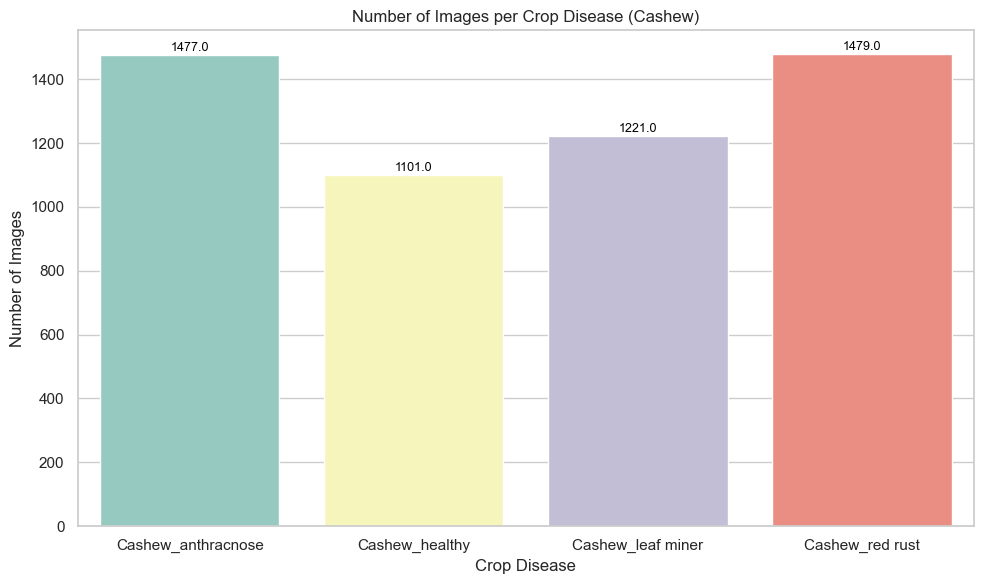

Crop: Cassava Total: 5 Diseased: 4
                          no. of images
Cassava_bacterial blight           1936
Cassava_brown spot                 1082
Cassava_green mite                  747
Cassava_healthy                     916
Cassava_mosaic                      879


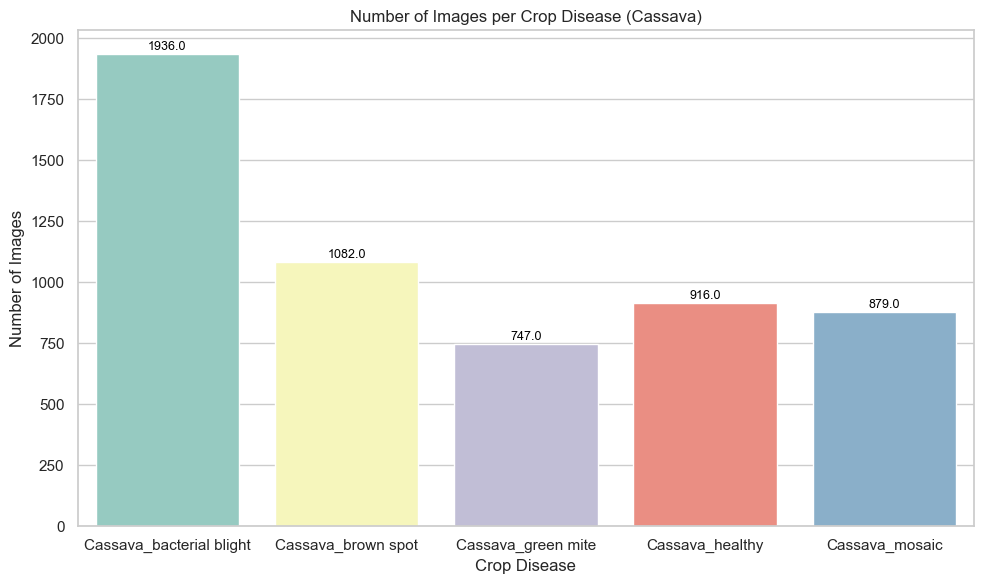

Crop: Maize Total: 4 Diseased: 3
                    no. of images
Maize_healthy                 129
Maize_leaf blight             621
Maize_leaf spot               783
Maize_streak virus            624


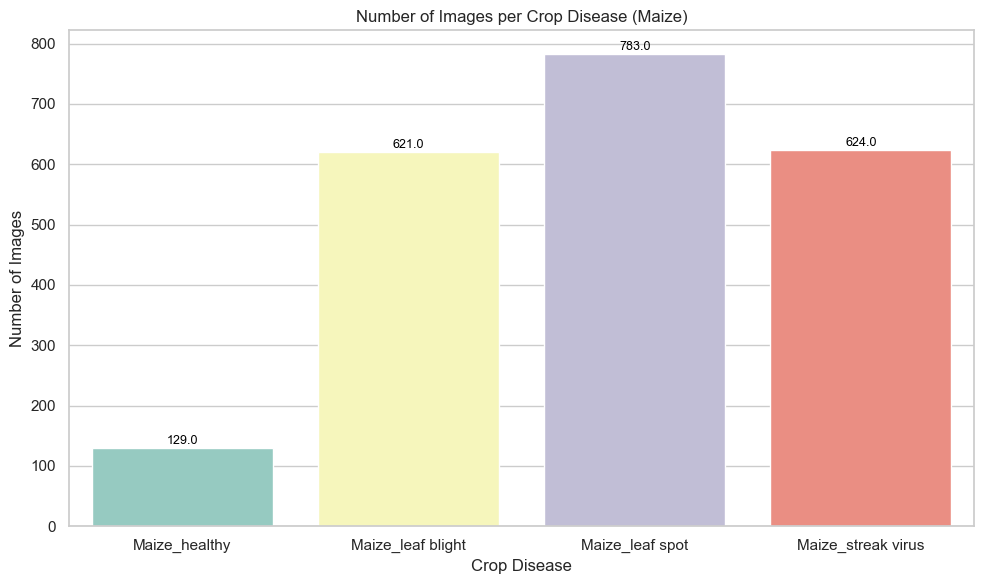

Crop: Tomato Total: 5 Diseased: 4
                           no. of images
Tomato_healthy                       406
Tomato_leaf blight                  1309
Tomato_leaf curl                     402
Tomato_septoria leaf spot           2133
Tomato_verticulium wilt             1015


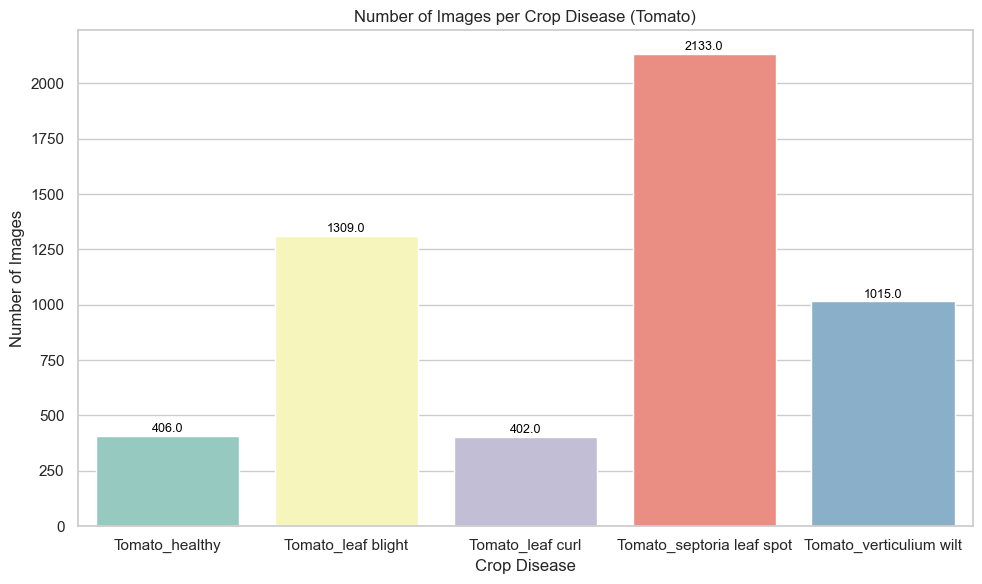

In [5]:
def analyze_crop(crop_name):
    crop_dir = os.path.join(test_dir, crop_name)

    disease = os.listdir(crop_dir)

    crop_info = {}
    for d in disease:
        name, status = d.split('_')
        if name in crop_info:
            crop_info[name]['total'] += 1
            if status != 'healthy':
                crop_info[name]['diseased'] += 1
        else:
            crop_info[name] = {'total': 1, 'diseased': 1 if status != 'healthy' else 0}

    for crop, stats in crop_info.items():
        print('Crop:', crop, 'Total:', stats['total'], 'Diseased:', stats['diseased'])

    img = Counter()

    for d in disease:
        num_images = len(os.listdir(os.path.join(crop_dir, d)))
        img[d] = num_images

    df = pd.DataFrame.from_dict(img, orient='index', columns=['no. of images'])
    print(df)

    sns.set(style='whitegrid', color_codes=True)

    plt.figure(figsize=(10, 6))

    ax = sns.barplot(x=df.index, y='no. of images', data=df, palette='Set3')

    plt.xlabel('Crop Disease')
    plt.ylabel('Number of Images')
    plt.title(f'Number of Images per Crop Disease ({crop_name})')
    plt.xticks()

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.tight_layout()
    plt.show()

for crop_name in crop_names:
    analyze_crop(crop_name)

In [6]:
def calculate_total_images(crop_name, dataset_dir):
    crop_dir = os.path.join(dataset_dir, crop_name)
    total_images = 0

    if os.path.exists(crop_dir):
        for disease_class in os.listdir(crop_dir):
            disease_class_dir = os.path.join(crop_dir, disease_class)
            if os.path.isdir(disease_class_dir):
                total_images += len(os.listdir(disease_class_dir))

    return total_images

for crop_name in crop_names:
    total_images = calculate_total_images(crop_name, test_dir)
    
    print('Crop:', crop_name)
    print('Total Testing Images:', total_images)
    print()

Crop: Cashew
Total Testing Images: 5278

Crop: Cassava
Total Testing Images: 5560

Crop: Maize
Total Testing Images: 2157

Crop: Tomato
Total Testing Images: 5265



# Deep Learning Models

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.optimizers import Adam

from sklearn.utils.class_weight import compute_class_weight

## CNN

In [9]:
batch_size = 64
img_size = 224
epoch = 10

In [10]:
# Data preprocessing
train_datagen = ImageDataGenerator(rescale = 1.0 / 255)
test_datagen = ImageDataGenerator(rescale = 1.0 / 255)

### Cassava

In [11]:
batch_size = 64
img_size = 224
epoch = 10

train_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
cassava = 'Cassava'
cassava_train_dir = os.path.join(train_dir, cassava)
cassava_test_dir = os.path.join(test_dir, cassava)
cassava_train_gen = train_datagen.flow_from_directory(
    cassava_train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42
)
cassava_test_gen = test_datagen.flow_from_directory(
    cassava_test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

cassava_indices = cassava_train_gen.class_indices

cassava_weights = compute_class_weight('balanced', classes=np.unique(cassava_train_gen.classes), y=cassava_train_gen.classes)
cassava_weights_dict = {class_index: weight for class_index, weight in zip(cassava_indices.values(), cassava_weights)}

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_size, img_size, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((3, 3)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((3, 3)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((3, 3)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(cassava_train_gen.class_indices), activation='softmax'))

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model.summary()

history_cassava = model.fit(
    cassava_train_gen,
    steps_per_epoch=cassava_train_gen.samples // batch_size,
    epochs=epoch,
    validation_data=cassava_test_gen,
    validation_steps=cassava_test_gen.samples // batch_size,
    class_weight=cassava_weights_dict,
)

Found 15315 images belonging to 5 classes.
Found 5560 images belonging to 5 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2

#### Result

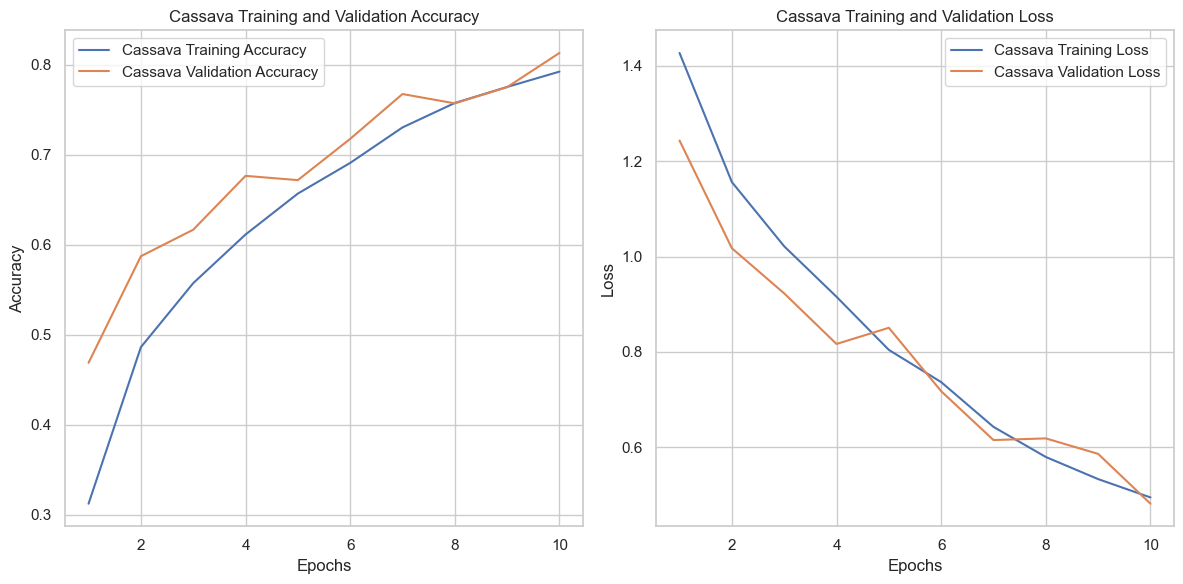

In [13]:
training_accuracy_cassava = history_cassava.history['accuracy']
validation_accuracy_cassava = history_cassava.history['val_accuracy']
training_loss_cassava = history_cassava.history['loss']
validation_loss_cassava = history_cassava.history['val_loss']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, epoch + 1), training_accuracy_cassava, label='Cassava Training Accuracy')
plt.plot(range(1, epoch + 1), validation_accuracy_cassava, label='Cassava Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Cassava Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epoch + 1), training_loss_cassava, label='Cassava Training Loss')
plt.plot(range(1, epoch + 1), validation_loss_cassava, label='Cassava Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cassava Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

87/87 [==============================] - 99s 945ms/step


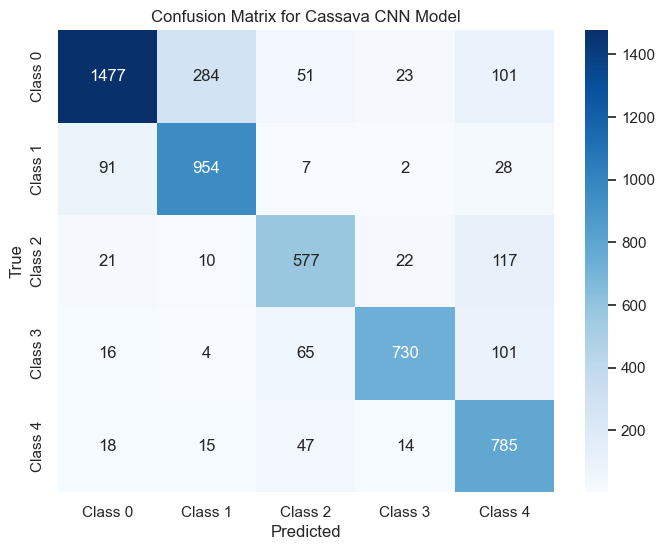

In [31]:
from sklearn.metrics import confusion_matrix

predictions_cassava = model.predict(cassava_test_gen)

true_labels_cassava = cassava_test_gen.classes

predicted_labels_cassava = predictions_cassava.argmax(axis=1)

confusion_cassava = confusion_matrix(true_labels_cassava, predicted_labels_cassava)

class_labels_cassava = [f'Class {i}' for i in range(len(cassava_train_gen.class_indices))]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_cassava, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels_cassava, yticklabels=class_labels_cassava)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Cassava CNN Model')
plt.show()

In [32]:
from sklearn.metrics import accuracy_score

predictions_cassava = model.predict(cassava_test_gen)
true_labels_cassava = cassava_test_gen.classes
predicted_labels_cassava = predictions_cassava.argmax(axis=1)
accuracy_cassava = accuracy_score(true_labels_cassava, predicted_labels_cassava)
accuracy_cassava_percent = accuracy_cassava * 100
print(f"Accuracy Score for Cassava CNN Model: {accuracy_cassava_percent:.2f}%")

87/87 [==============================] - 84s 954ms/step
Accuracy Score for Cassava CNN Model: 81.35%


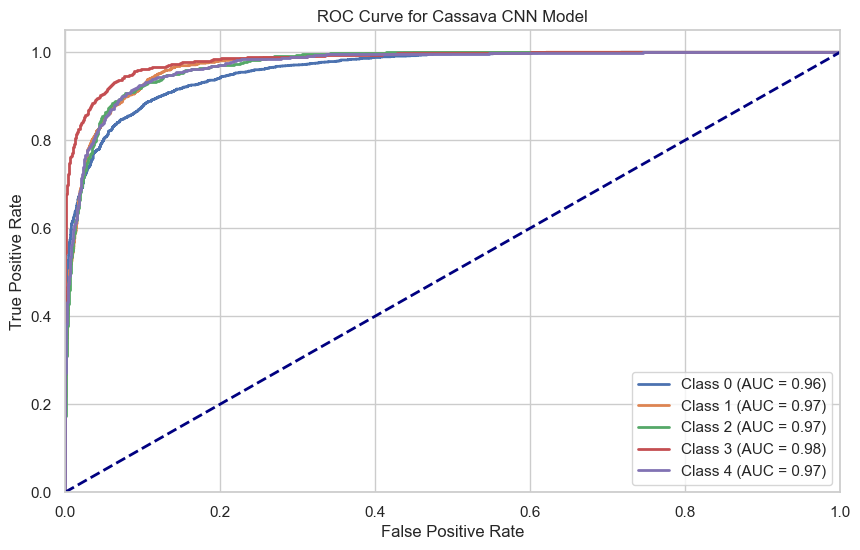

In [34]:
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(cassava_train_gen.class_indices)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_cassava, predictions_cassava[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Cassava CNN Model')
plt.legend(loc='lower right')
plt.show()

## VGG-16

In [12]:
vgg = VGG16(input_shape=(img_size, img_size, 3), weights='imagenet', include_top=False)
# Freeze the layers of the pre-trained VGG16
vgg.trainable = False
x = Flatten()(vgg.output)
predictions = Dense(len(cassava_train_gen.class_indices), activation='softmax')(x)

cassava_vgg = Model(inputs=vgg.input, outputs=predictions)

cassava_vgg.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
cassava_vgg.summary()
cassava_history = cassava_vgg.fit(
    cassava_train_gen,
    steps_per_epoch=cassava_train_gen.samples // batch_size,
    epochs=5,
    validation_data=cassava_test_gen,
    validation_steps=cassava_test_gen.samples // batch_size,
    class_weight=cassava_weights_dict,
)

58889256/58889256 [==============================] - 48s 1us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                             

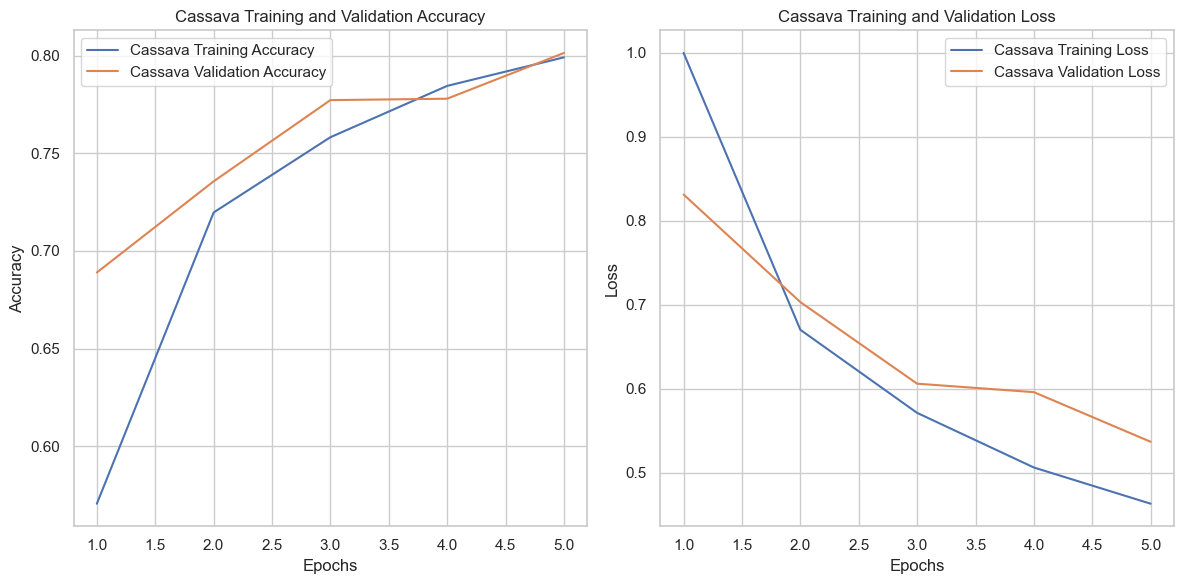

In [25]:
training_accuracy_cassava = cassava_history.history['accuracy']
validation_accuracy_cassava = cassava_history.history['val_accuracy']
training_loss_cassava = cassava_history.history['loss']
validation_loss_cassava = cassava_history.history['val_loss']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 6), training_accuracy_cassava, label='Cassava Training Accuracy')
plt.plot(range(1, 6), validation_accuracy_cassava, label='Cassava Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Cassava Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 6), training_loss_cassava, label='Cassava Training Loss')
plt.plot(range(1, 6), validation_loss_cassava, label='Cassava Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cassava Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
from sklearn.metrics import classification_report

testing_predictions_cassava = cassava_vgg.predict(cassava_test_gen)
testing_pred_labels_cassava = np.argmax(testing_predictions_cassava, axis=1)
testing_true_labels_cassava = cassava_test_gen.classes

testing_report_cassava = classification_report(testing_true_labels_cassava, testing_pred_labels_cassava, target_names=cassava_train_gen.class_indices.keys())

print("Testing Precision and Recall for Cassava VGG Model:\n", testing_report_cassava)


87/87 [==============================] - 748s 9s/step
Testing Precision and Recall for Cassava VGG Model:
                           precision    recall  f1-score   support

Cassava_bacterial blight       0.81      0.77      0.79      1936
      Cassava_brown spot       0.80      0.76      0.78      1082
      Cassava_green mite       0.69      0.82      0.75       747
         Cassava_healthy       0.90      0.89      0.90       916
          Cassava_mosaic       0.80      0.81      0.81       879

                accuracy                           0.80      5560
               macro avg       0.80      0.81      0.80      5560
            weighted avg       0.80      0.80      0.80      5560



In [28]:
from sklearn.metrics import accuracy_score

testing_accuracy_cassava = accuracy_score(testing_true_labels_cassava, testing_pred_labels_cassava)
testing_accuracy_cassava_percent = testing_accuracy_cassava * 100

print(f"Testing Accuracy for Cassava VGG Model: {testing_accuracy_cassava_percent:.2f}%")

Testing Accuracy for Cassava VGG Model: 80.13%


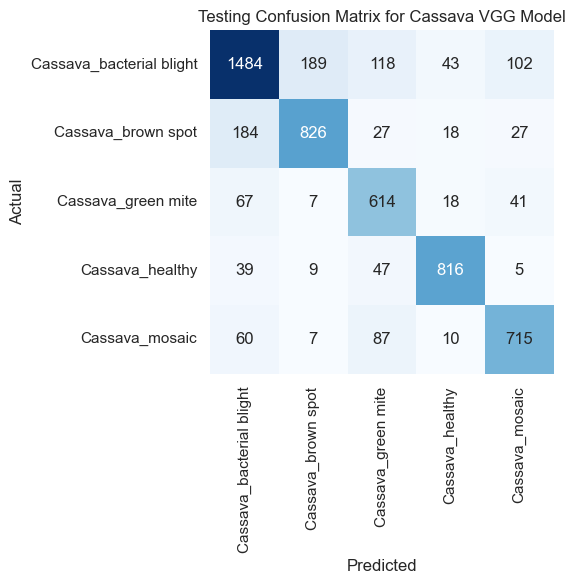

In [29]:
from sklearn.metrics import confusion_matrix

testing_confusion_matrix_cassava = confusion_matrix(testing_true_labels_cassava, testing_pred_labels_cassava)

plt.figure(figsize=(12, 6))

sns.heatmap(testing_confusion_matrix_cassava, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=cassava_test_gen.class_indices.keys(),
            yticklabels=cassava_test_gen.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Testing Confusion Matrix for Cassava VGG Model')

plt.tight_layout()
plt.show()

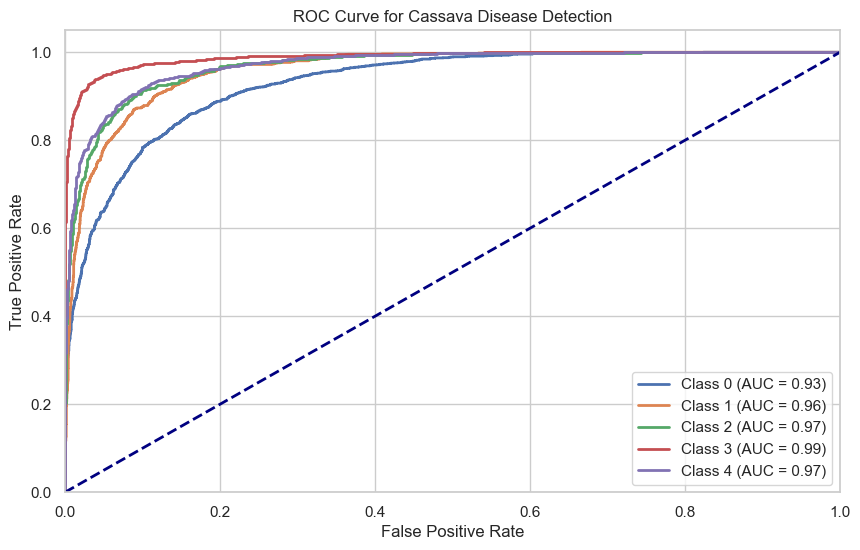

In [30]:
from sklearn.metrics import roc_curve, auc

n_classes_cassava = len(cassava_test_gen.class_indices)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes_cassava):
    fpr[i], tpr[i], _ = roc_curve(testing_true_labels_cassava, testing_predictions_cassava[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))

for i in range(n_classes_cassava):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Cassava Disease Detection')
plt.legend(loc='lower right')
plt.show()


## CNN

In [21]:
tomato = 'Tomato'  
tomato_train_dir = os.path.join(train_dir, tomato) 
tomato_test_dir = os.path.join(test_dir, tomato)  

tomato_train_gen = train_datagen.flow_from_directory(
    tomato_train_dir,  
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

tomato_test_gen = test_datagen.flow_from_directory(
    tomato_test_dir,  
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

tomato_indices = tomato_train_gen.class_indices  

tomato_weights = compute_class_weight('balanced', classes=np.unique(tomato_train_gen.classes), y=tomato_train_gen.classes)
tomato_weights_dict = {class_index: weight for class_index, weight in zip(tomato_indices.values(), tomato_weights)}

model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_size, img_size, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D((3, 3)))

model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D((3, 3)))

model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D((3, 3)))

model1.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

model1.add(Flatten())

model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(len(tomato_train_gen.class_indices), activation='softmax'))

model1.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model1.summary()

model1.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

history_tomato = model1.fit(
    tomato_train_gen,
    steps_per_epoch=tomato_train_gen.samples // batch_size,
    epochs=epoch,
    validation_data=tomato_test_gen,
    validation_steps=tomato_test_gen.samples // batch_size,
    class_weight=tomato_weights_dict,
)

Found 16926 images belonging to 5 classes.
Found 5265 images belonging to 5 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 74, 74, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None,

#### Result

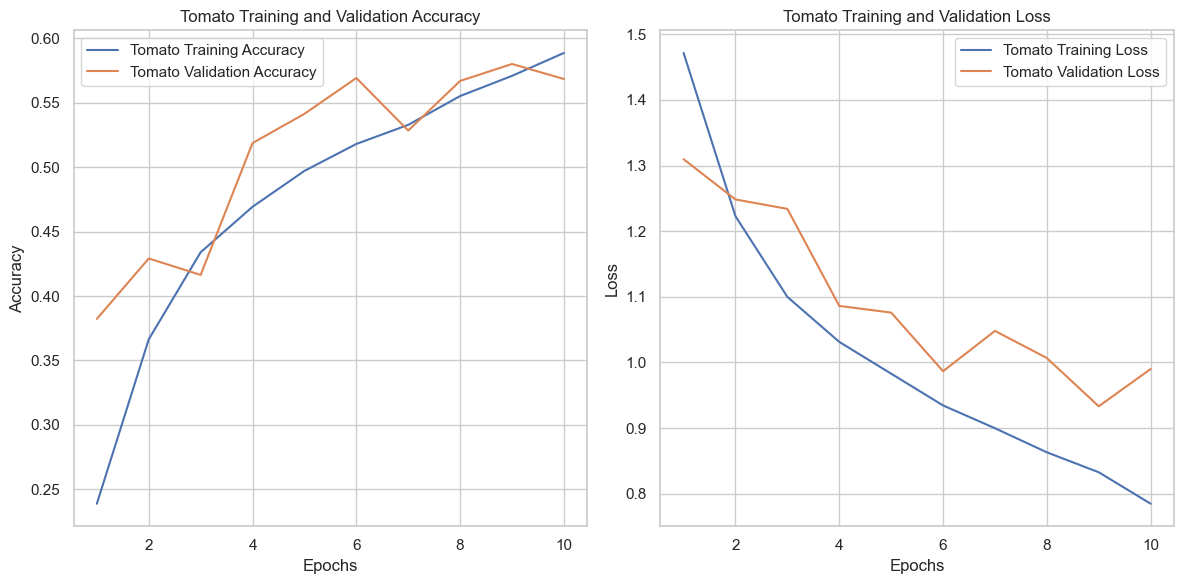

In [23]:
training_accuracy_tomato = history_tomato.history['accuracy']
validation_accuracy_tomato = history_tomato.history['val_accuracy']
training_loss_tomato = history_tomato.history['loss']
validation_loss_tomato = history_tomato.history['val_loss']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), training_accuracy_tomato, label='Tomato Training Accuracy')
plt.plot(range(1, 11), validation_accuracy_tomato, label='Tomato Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Tomato Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), training_loss_tomato, label='Tomato Training Loss')
plt.plot(range(1, 11), validation_loss_tomato, label='Tomato Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Tomato Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

83/83 [==============================] - 80s 957ms/step


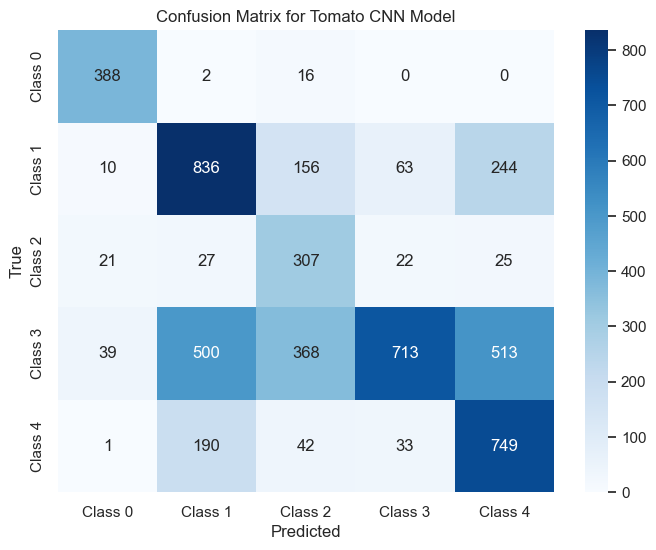

In [38]:
predictions_tomato = model1.predict(tomato_test_gen)

true_labels_tomato = tomato_test_gen.classes

predicted_labels_tomato = predictions_tomato.argmax(axis=1)

confusion_tomato = confusion_matrix(true_labels_tomato, predicted_labels_tomato)

class_labels_tomato = [f'Class {i}' for i in range(len(tomato_train_gen.class_indices))]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_tomato, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels_tomato, yticklabels=class_labels_tomato)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Tomato CNN Model')
plt.show()

In [39]:
accuracy_tomato = accuracy_score(true_labels_tomato, predicted_labels_tomato)

accuracy_tomato_percent = accuracy_tomato * 100

print(f"Accuracy Score for Tomato CNN Model: {accuracy_tomato_percent:.2f}%")

Accuracy Score for Tomato CNN Model: 56.85%


In [40]:
report_tomato = classification_report(true_labels_tomato, predicted_labels_tomato, target_names=class_labels_tomato)

print("Classification Report for Tomato CNN Model (Model1):\n", report_tomato)

Classification Report for Tomato CNN Model (Model1):
               precision    recall  f1-score   support

     Class 0       0.85      0.96      0.90       406
     Class 1       0.54      0.64      0.58      1309
     Class 2       0.35      0.76      0.48       402
     Class 3       0.86      0.33      0.48      2133
     Class 4       0.49      0.74      0.59      1015

    accuracy                           0.57      5265
   macro avg       0.62      0.69      0.61      5265
weighted avg       0.67      0.57      0.56      5265



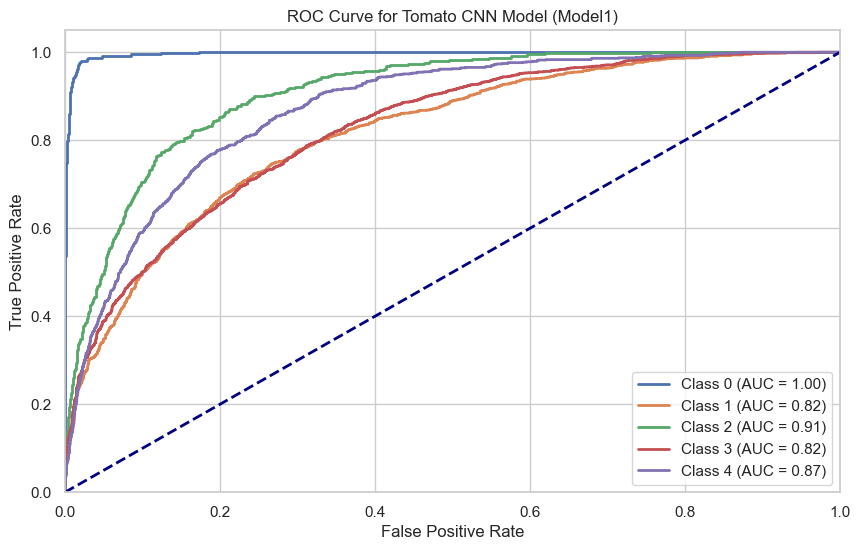

In [41]:
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(class_labels_tomato)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_tomato, predictions_tomato[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tomato CNN Model (Model1)')
plt.legend(loc='lower right')
plt.show()